In [30]:
import numpy as np
import librosa
import matplotlib.pyplot as plt


numpy digunakan untuk perhitungan numerik, seperti membuat sinyal.

librosa adalah library untuk analisis audio, meskipun belum digunakan di sel awal.

matplotlib.pyplot digunakan untuk memvisualisasikan sinyal.

In [31]:

def plot_signal(signal, sr=1000, samples_to_show=500, title="Signal", xlabel="Time (s)", ylabel="Amplitude"):
   
    t = np.arange(len(signal)) / sr

    plt.figure(figsize=(10, 4))
    plt.plot(t[:samples_to_show], signal[:samples_to_show])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


signal: array sinyal yang akan divisualisasikan.

sr: sampling rate (default 1000 Hz).

samples_to_show: jumlah sampel yang ditampilkan (default 500).

Menampilkan grafik waktu vs amplitudo.

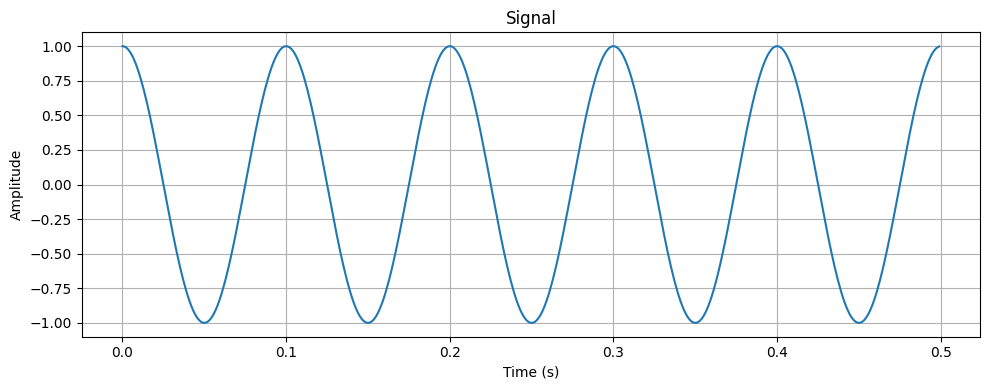

In [32]:
duration = 0.1        # in seconds
sr = 22000            # sample rate (Hz)
freq = 220              # frequency  (Hz)
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

cosine_signal = np.cos(2 * np.pi * freq * t)

plot_signal(cosine_signal)

Membuat sinyal kosinus dengan frekuensi 220 Hz selama 0.1 detik.

Sampling rate 22000 Hz.

Sinyal divisualisasikan dengan plot_signal.

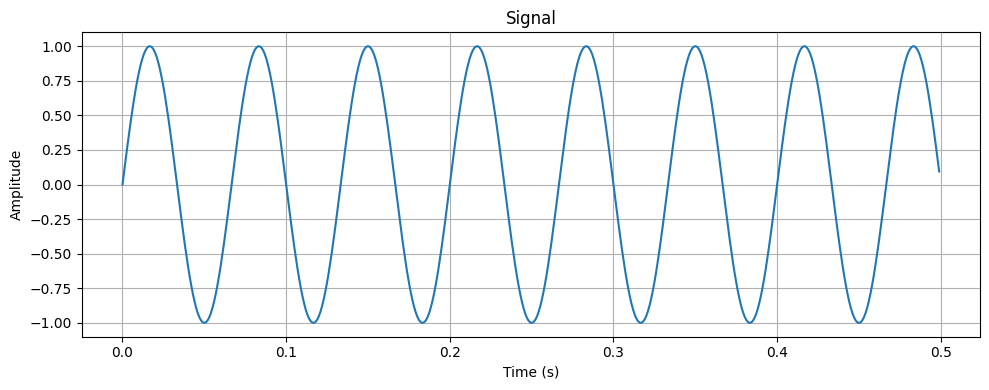

In [33]:
duration = 0.1        # in seconds
sr = 22000            # sample rate (Hz)
freq = 330              # frequency  (Hz)
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

sine_signal = np.sin(2 * np.pi * freq * t)

plot_signal(sine_signal)


Sama seperti sebelumnya, tetapi ini untuk sinyal sinus dengan frekuensi 330 Hz.

# Mixing signal

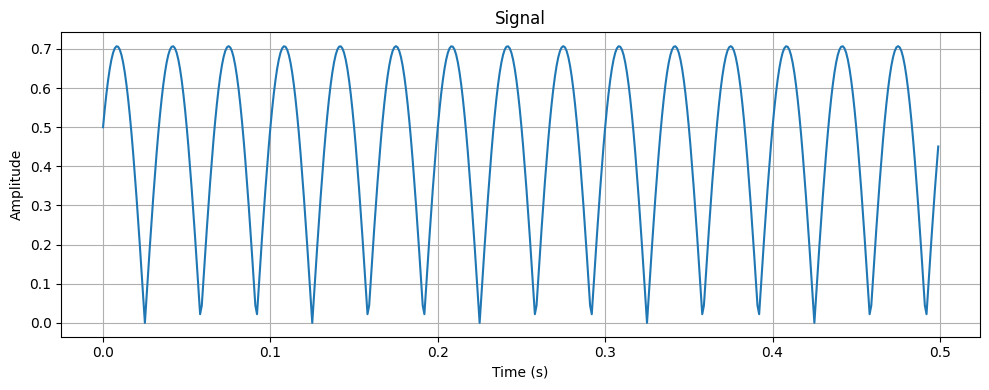

In [34]:
sine_wave = np.sin(2 * np.pi * freq * t)
cosine_wave = np.cos(2 * np.pi * freq * t)

mixed_signal = 0.5 * sine_wave + 0.5 * cosine_wave
rectified_signal = np.abs(mixed_signal)

plot_signal(rectified_signal)

Menggabungkan sinyal sinus dan kosinus dengan bobot 0.5.

Kemudian dilakukan penyearahan (rectified) menggunakan np.abs() untuk mengambil nilai absolut.

Hasilnya adalah sinyal campuran yang hanya bernilai positif.

Digunakan untuk simulasi sinyal analog seperti sinyal audio yang telah di-rectify.

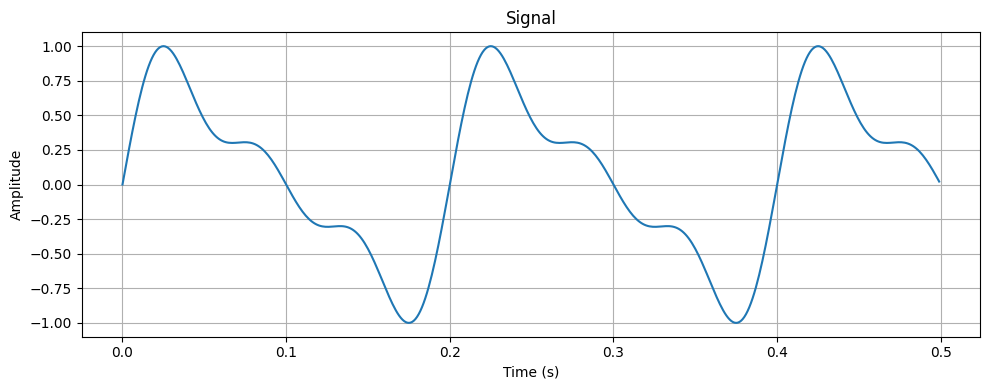

In [35]:
sr = 1000          # sample rate (Hz)
duration = 1.0     # seconds
freq = 5           # base frequency (Hz)
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Build a sharp waveform by adding harmonics
# Fundamental + 2nd + 3rd harmonic
wave = (
    1.0 * np.sin(2 * np.pi * freq * t) +
    0.5 * np.sin(2 * np.pi * 2 * freq * t) +
    0.33 * np.sin(2 * np.pi * 3 * freq * t)
)

# Normalize (optional)
wave /= np.max(np.abs(wave))
plot_signal(wave)

Ini menunjukkan bagaimana sinyal kompleks dibentuk dari penjumlahan beberapa harmonik (kelipatan frekuensi dasar).

Pendekatan ini biasa digunakan untuk mendekati bentuk gelombang seperti segitiga atau persegi melalui Fourier Series.

Normalisasi dilakukan agar amplitudo maksimum = 1.

/tmp/ipykernel_35/1020727942.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_wave, wave_values, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Wave (sampled)', use_line_collection=True)


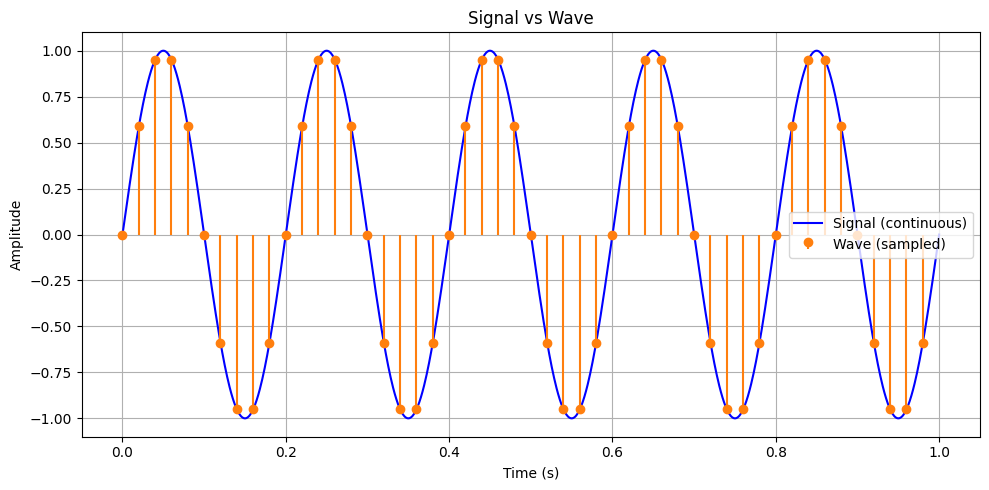

In [36]:
def signal_function(t, freq=5):
    """Ideal continuous signal: sine wave with frequency `freq` Hz."""
    return np.sin(2 * np.pi * freq * t)

t_cont = np.linspace(0, 1, 1000) 
signal_values = signal_function(t_cont)

sr = 50  
t_wave = np.linspace(0, 1, sr, endpoint=False)
wave_values = signal_function(t_wave)

plt.figure(figsize=(10, 5))
plt.plot(t_cont, signal_values, label='Signal (continuous)', color='blue')
plt.stem(t_wave, wave_values, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Wave (sampled)', use_line_collection=True)
plt.title("Signal vs Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Membandingkan sinyal kontinu (biru) dan versi yang telah disampling (oranye) menggunakan stem plot.

Ini mengilustrasikan perbedaan antara fungsi matematis kontinu dan data diskrit.

# Spektrum

Dalam pemrosesan sinyal, spektrum mengacu pada distribusi energi sinyal (atau magnitudo) pada frekuensi yang berbeda. Hal ini dihitung dengan menggunakan Transformasi Fourier.

/tmp/ipykernel_35/3138362232.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, magnitude, basefmt=' ', use_line_collection=True)


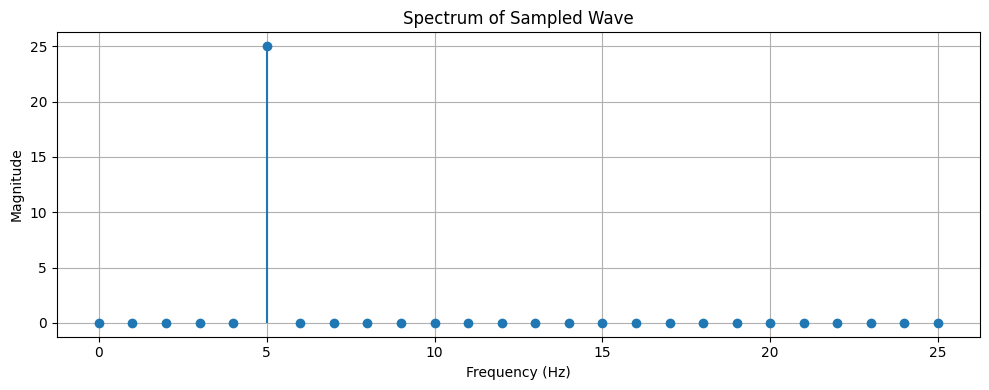

In [37]:
N = len(wave_values)
fft_vals = np.fft.rfft(wave_values)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

# 6. Plot Spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies, magnitude, basefmt=' ', use_line_collection=True)
plt.title("Spectrum of Sampled Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

Menggunakan FFT (np.fft.rfft) untuk menghitung spektrum dari wave_values.

rfft menghasilkan hanya separuh spektrum (karena simetris untuk sinyal real).

frequencies menentukan posisi sumbu X (frekuensi).

magnitude adalah nilai amplitudo di masing-masing frekuensi.

Digambarkan sebagai spektrum batang.

# Time-Domain Signal
In the time domain, a signal is represented by how its amplitude changes over time. This is the most intuitive view: we see a waveform moving up and down as time progresses.

For example, an audio signal in the time domain shows how air pressure (or voltage) changes from moment to moment. If you record your voice, the waveform you see on the screen is a time-domain representation.

Mathematically, a time-domain signal is written as: $x(t)$ or $x[t]$

This tells us: "At time tt (or step nn), the value of the signal is xx."

# Frequency-domain signal

In the frequency domain, a signal is described by what frequencies are present and how strong they are. Instead of showing what happens over time, the frequency-domain view shows which sine and cosine waves make up the signal, and how much of each frequency is involved.

Mathematically, the frequency-domain signal is written as: $X(f)$ or $X[k]$

Here, each value tells us: "This much energy (or magnitude) exists at frequency $f$."

You get the frequency-domain version of a signal by applying a Fourier Transform (or Discrete Fourier Transform for digital signals). This transformation breaks the signal into its frequency components.

/tmp/ipykernel_35/2686296016.py:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, magnitude, basefmt=" ", use_line_collection=True)


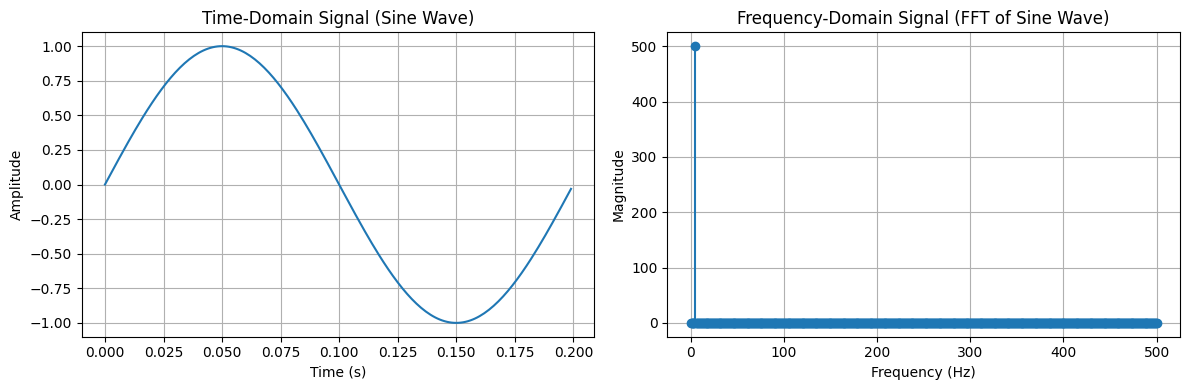

In [38]:
sr = 1000          # Sample rate in Hz
duration = 1.0     # Duration in seconds
freq = 5           # Frequency of sine wave (Hz)

# Time axis
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Generate sine wave (time-domain)
sine_wave = np.sin(2 * np.pi * freq * t)

# Compute frequency-domain using FFT
N = len(sine_wave)
fft_vals = np.fft.rfft(sine_wave)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

# Plot Time-Domain Signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t[:200], sine_wave[:200])  # show 200 samples for clarity
plt.title("Time-Domain Signal (Sine Wave)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot Frequency-Domain Signal
plt.subplot(1, 2, 2)
plt.stem(frequencies, magnitude, basefmt=" ", use_line_collection=True)
plt.title("Frequency-Domain Signal (FFT of Sine Wave)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

Dibuat sinyal sinus sederhana 5 Hz.

Ditampilkan dalam dua subplot:

Kiri: bentuk gelombang sinus dalam waktu.

Kanan: hasil spektrum frekuensi-nya (hanya puncak di 5 Hz karena sinyal murni).

## Lion Roar


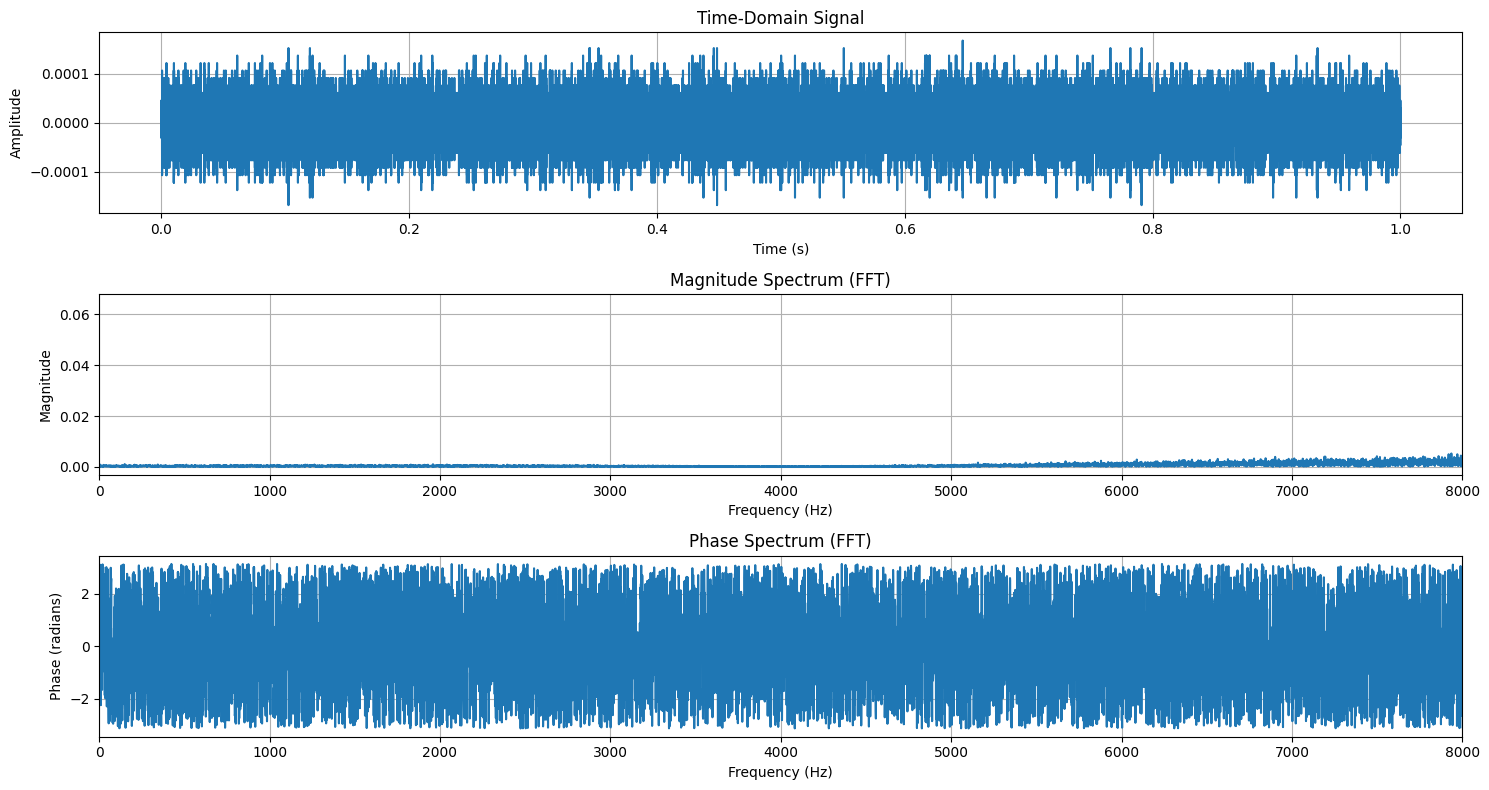

In [39]:

file_path = "/kaggle/input/lion-roar/559600__podcapocalipsis__lion-roar.wav"
y, sr = librosa.load(file_path, sr=None)
y = y[:sr]

t = np.linspace(0, len(y) / sr, num=len(y))

N = len(y)
fft_vals = np.fft.rfft(y)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)
phase = np.angle(fft_vals)

plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(frequencies, magnitude)
plt.title("Magnitude Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 8000)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(frequencies, phase)
plt.title("Phase Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.xlim(0, 8000)
plt.grid(True)

plt.tight_layout()
plt.show()


# Explanation

## Time-Domain
The time-domain signal represents how the amplitude of the sound wave changes over time. On this plot, the horizontal axis shows time in seconds, while the vertical axis shows the amplitude (or intensity) of the signal. In the case of the cat meow, this plot helps us visualize how the meow starts, peaks, and fades. You'll see fluctuations that correspond to louder and softer parts of the sound. Although this view shows how the signal evolves over time, it does not tell us anything about what frequencies are present in the sound.

## Magnitude Spectrum
The magnitude spectrum shows which frequencies are present in the signal and how strong each of them is. Here, the x-axis shows frequency in Hertz (Hz), and the y-axis shows the magnitude, which reflects the strength or intensity of that frequency in the original signal. For the cat meow, the spectrum will likely have multiple peaks, because the sound is not a simple tone but a mix of various frequencies. These peaks help us understand the tonal content of the meow, such as which frequency ranges are dominant. This view is essential in many applications like sound analysis, voice recognition, and music processing.

## Phase Spectrum
The phase spectrum displays the phase shift of each frequency component. While the magnitude tells us how strong each frequency is, the phase tells us where each frequency component starts in time, relative to the beginning of the signal. In this plot, the x-axis is again frequency in Hertz, and the y-axis is the phase in radians, typically ranging from −π−π to ππ. Although humans are generally not sensitive to phase in terms of perception, the phase is crucial if you want to reconstruct the original waveform accurately using an inverse Fourier Transform. It plays an important role in signal reconstruction, filtering, and various forms of signal synthesis.

| Plot                   | What it shows                                                                                                                                         | Why it matters                                                                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Time-Domain Signal** | Displays the original waveform as it changes over time. The x-axis shows time (seconds), and the y-axis shows amplitude. You can see how the sound varies — where it begins, peaks, and ends. | Helps visualize the envelope of the sound (e.g., meow's rise and fall). It shows timing clearly but doesn't reveal which frequencies are present in the signal.                                                |
| **Magnitude Spectrum** | Shows the strength (magnitude) of each frequency in the signal. The x-axis is frequency in Hz, and the y-axis is magnitude. You'll see peaks for tones present in the signal.            | Reveals what the sound is made of. Multiple peaks indicate complex tones like a meow. Useful for audio analysis, filtering, and feature extraction.                                                             |
| **Phase Spectrum**     | Displays the phase shift of each frequency component. The x-axis shows frequency in Hz, and the y-axis shows phase (in radians, from -π to π).                                             | Phase is important for reconstructing the original signal accurately. While humans don't hear phase directly, it's crucial for signal synthesis, inverse FFT, and advanced processing techniques.              |


# Fourier Transform
Transformasi Fourier adalah metode matematika yang membantu kita memahami frekuensi apa saja yang membentuk sinyal. Dalam kehidupan sehari-hari, kita sering berpikir tentang sinyal dalam hal bagaimana sinyal tersebut bervariasi dari waktu ke waktu-seperti bagaimana volume lagu naik dan turun. Ini disebut domain waktu. Tetapi sinyal juga dapat dipahami dengan melihat nada (atau frekuensi) yang dikandungnya, yang kita sebut sebagai domain frekuensi. Transformasi Fourier memungkinkan kita untuk beralih dari domain waktu ke domain frekuensi.

Pada intinya, ide di balik Transformasi Fourier adalah bahwa setiap sinyal yang kompleks - tidak peduli seberapa berantakan - dapat dianggap sebagai kombinasi gelombang sinus dan kosinus yang lebih sederhana, masing-masing dengan frekuensi, amplitudo, dan fasanya sendiri. Sebagai contoh, gelombang persegi (yang memiliki ujung yang tajam) sebenarnya terdiri dari jumlah gelombang sinus yang tak terbatas dengan frekuensi dan amplitudo yang meningkat. Transformasi Fourier memberi tahu kita berapa banyak frekuensi yang ada dalam sinyal asli kita.

Dalam pemrosesan sinyal digital, kita biasanya tidak bekerja dengan sinyal kontinu. Kita berurusan dengan nilai sampel diskrit yang diukur pada interval waktu yang teratur. Di situlah Fast Fourier Transform (FFT) berperan. FFT adalah algoritme yang efisien untuk menghitung Transformasi Fourier Diskrit (DFT). Algoritma ini mengambil daftar nilai sinyal dan dengan cepat menghitung jumlah setiap frekuensi yang ada. Tanpa FFT, proses ini akan menjadi terlalu lambat untuk aplikasi real-time seperti pemrosesan audio atau pemfilteran gambar.

Satu hal yang penting untuk dipahami adalah bahwa output dari FFT berisi angka-angka yang kompleks. Bilangan-bilangan ini membawa dua informasi: magnitudo (seberapa kuat frekuensi), dan fase (di mana gelombang dimulai pada waktunya). Seringkali, kita fokus pada magnitudo karena ini menunjukkan kepada kita frekuensi mana yang dominan, tetapi fase juga penting dalam merekonstruksi sinyal asli dengan benar.

Singkatnya, Transformasi Fourier-terutama dalam bentuk FFT-adalah salah satu alat yang paling kuat dalam pemrosesan sinyal digital. Alat ini mengubah sinyal ke dalam bentuk yang berbeda yang mengungkapkan pola dan struktur yang tidak mudah dilihat dalam domain waktu. Baik Anda menganalisis audio, gambar, atau data sensor, FFT membuka cara baru untuk memahami apa yang sebenarnya terjadi di dalam sinyal.

# Understanding the Discrete Fourier Transform (DFT)

## 📌 What is DFT?

The Discrete Fourier Transform (DFT) is a mathematical tool used to **transform a time-domain signal into its frequency components**. It's the foundation of the Fast Fourier Transform (FFT), which is just a faster way to compute the DFT.

---

## 🧮 DFT Equation

Given a signal $ x[n]$ of length $ N $, the DFT is defined as:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j 2\pi \frac{kn}{N}}, \quad k = 0, 1, 2, \ldots, N-1
$$

Where:
- $x[n] $: input signal in time domain (samples)
- $ X[k]$: output signal in frequency domain (spectrum)
- $ N $: total number of samples
- $ j$: imaginary unit ( $ j^2 = -1 $ )
- $e^{-j 2\pi \frac{kn}{N}} $: complex exponential (equivalent to a combination of sine and cosine)

---
## Step-by-Step Explanation

**1. Sample the signal:**  
You start with a sequence of samples, like $ x[0], x[1], ..., x[N-1] $.

**2. Multiply by sine and cosine:**  
The exponential term acts like a wave (sine and cosine) that extracts the contribution of a specific frequency.

**3. Sum the products:**  
Each $ X[k] $ is a sum that shows how much of frequency $ k $ is in the original signal.

**4. Repeat for all $ k $:**  
You repeat this process for each frequency $ k$ from 0 to $ N-1$.

---

## Inverse DFT

To convert back from frequency domain to time domain, use:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi \frac{kn}{N}}
$$

This reconstructs the original signal.

---

## Summary

- The DFT breaks a signal into its frequency parts.
- The FFT is just a fast way to compute the DFT.
- You often use only the magnitude of $ X[k] $ to see which frequencies dominate.

## Why Do We Reconstruct a Signal After Applying FFT?

We reconstruct a signal after applying FFT (Fourier Transform) because **FFT is not the end — it's a tool for understanding, processing, or modifying** the signal in the frequency domain. Once those tasks are done, we often want to **return to the time domain**, where the signal can be **heard, seen, or used** in its original form.

### What FFT Does

When you apply the **FFT**, you're breaking down the signal into a set of sine and cosine waves that describe how much of each frequency is present. This is extremely useful for tasks like:

- Identifying dominant frequencies
- Filtering out noise
- Compressing data
- Detecting features or patterns

However, the **frequency-domain representation** (i.e., the FFT result) is **not directly usable as a time-domain signal**. You can’t play it as audio, and it doesn’t show the signal’s evolution over time. It's like analyzing the ingredients of a recipe — useful, but not something you can eat.

### Why Reconstruction Is Needed

Once you've analyzed or modified the spectrum — for example, by:

- Removing high-frequency noise
- Emphasizing certain frequency bands
- Modifying phase or amplitude

—you then use the **Inverse FFT (IFFT)** to reconstruct the signal. This transforms the frequency-domain data back into a sequence of time-domain samples — something that can be plotted, played, or stored.

### Summary

We reconstruct the signal after applying FFT because the **goal is not to stay in the frequency domain**, but to **gain insight or make changes**, and then bring the signal **back into a usable, interpretable form**.


In [40]:
def analyze_wave(sr, duration=1.0, freq=5):
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    wave = signal_function(t, freq)

    # FFT
    N = len(wave)
    fft_vals = np.fft.rfft(wave)
    freqs = np.fft.rfftfreq(N, d=1/sr)

    magnitude = np.abs(fft_vals)
    power = magnitude ** 2
    phase = np.angle(fft_vals)

    # Plot time domain
    plt.figure(figsize=(10, 3))
    plt.plot(t, wave)
    plt.title(f"Waveform (Sampling Rate = {sr} Hz)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot magnitude spectrum
    plt.figure(figsize=(10, 3))
    plt.stem(freqs, magnitude, basefmt=' ', use_line_collection=True)
    plt.title("Magnitude Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot power spectrum
    plt.figure(figsize=(10, 3))
    plt.stem(freqs, power, basefmt=' ', use_line_collection=True)
    plt.title("Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot phase spectrum
    plt.figure(figsize=(10, 3))
    plt.stem(freqs, phase, basefmt=' ', use_line_collection=True)
    plt.title("Phase Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (radians)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

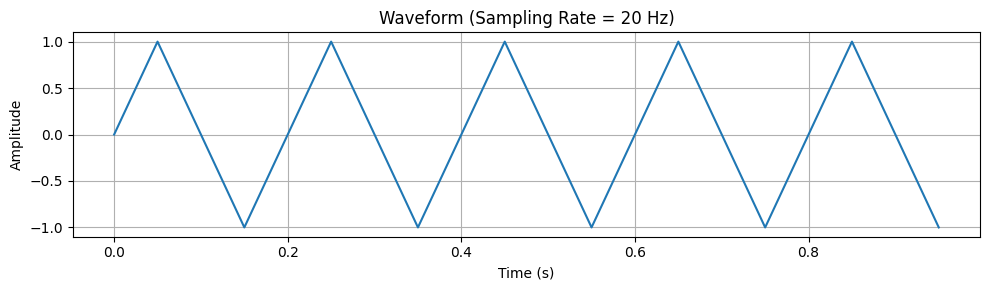

/tmp/ipykernel_35/805699800.py:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, magnitude, basefmt=' ', use_line_collection=True)


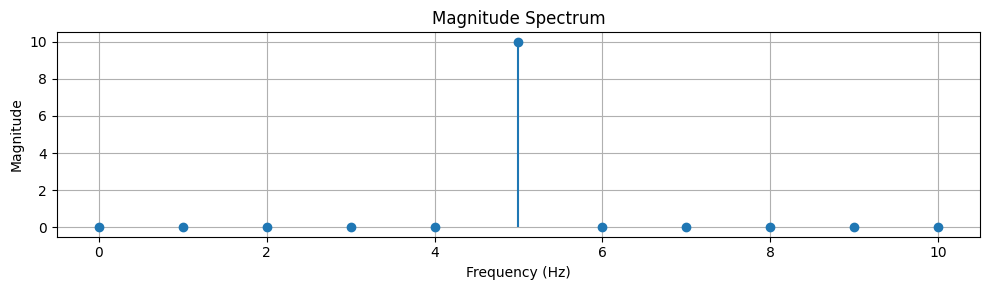

/tmp/ipykernel_35/805699800.py:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, power, basefmt=' ', use_line_collection=True)


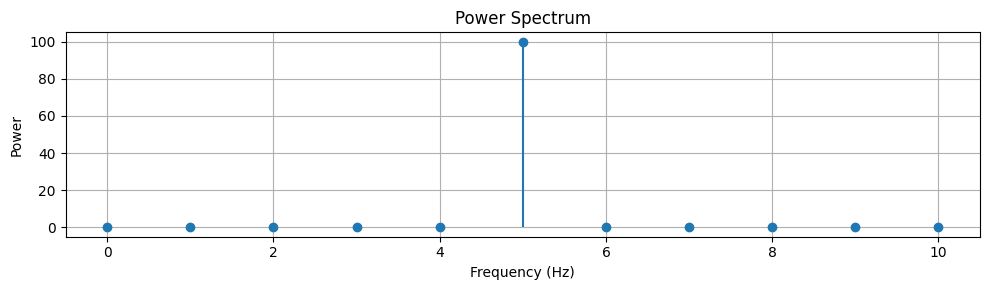

/tmp/ipykernel_35/805699800.py:46: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, phase, basefmt=' ', use_line_collection=True)


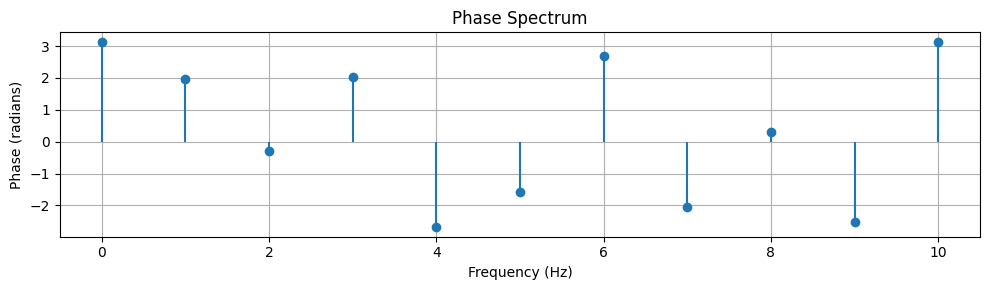

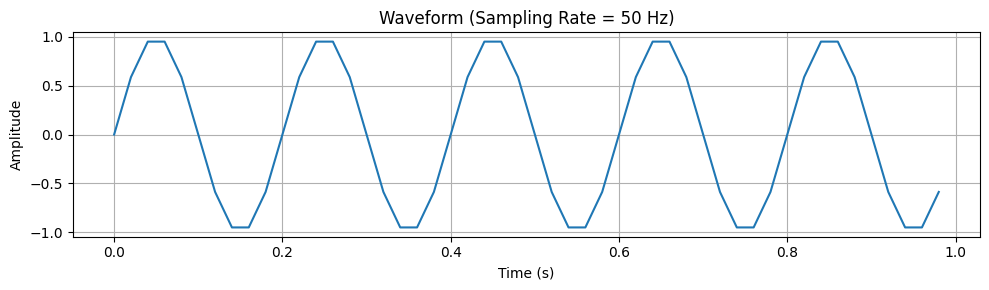

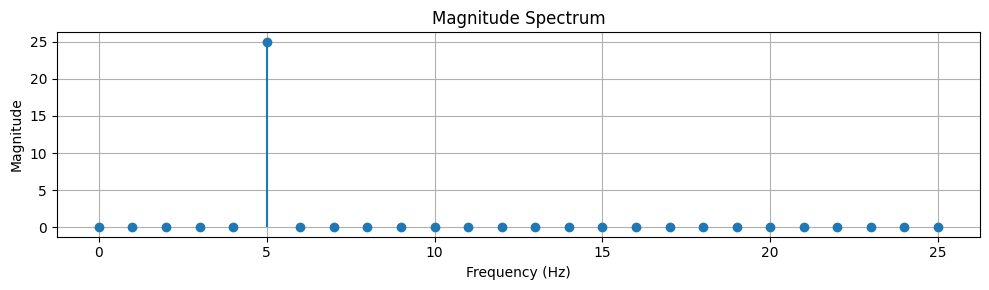

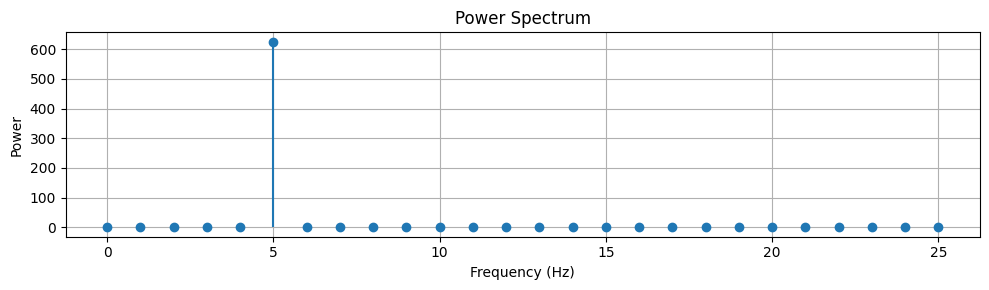

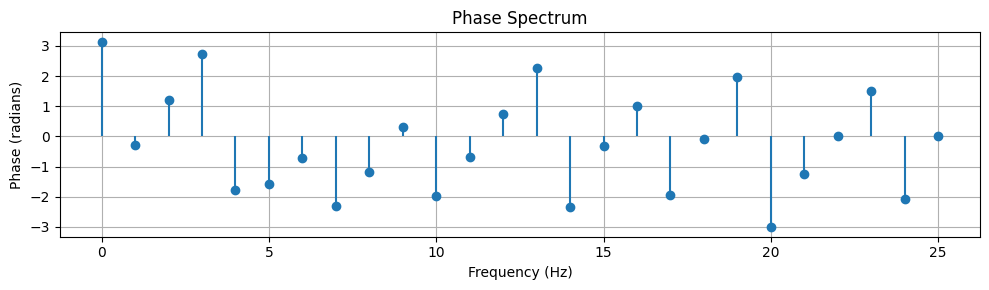

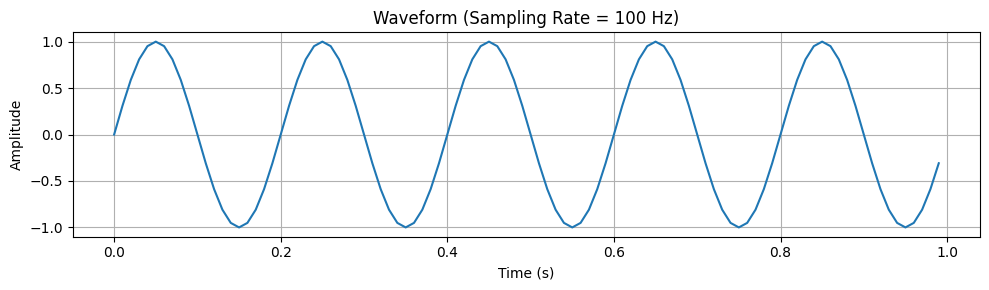

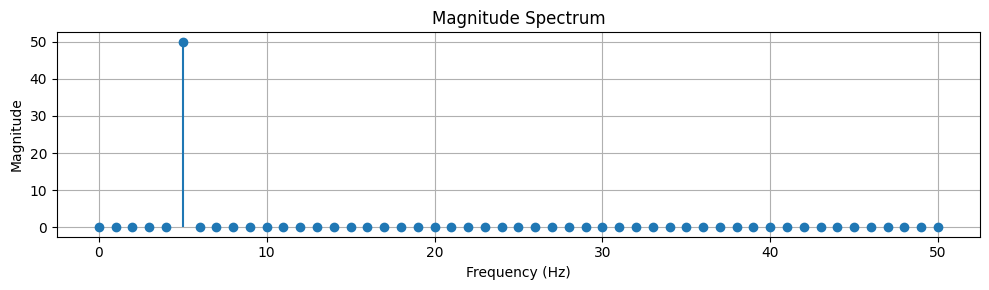

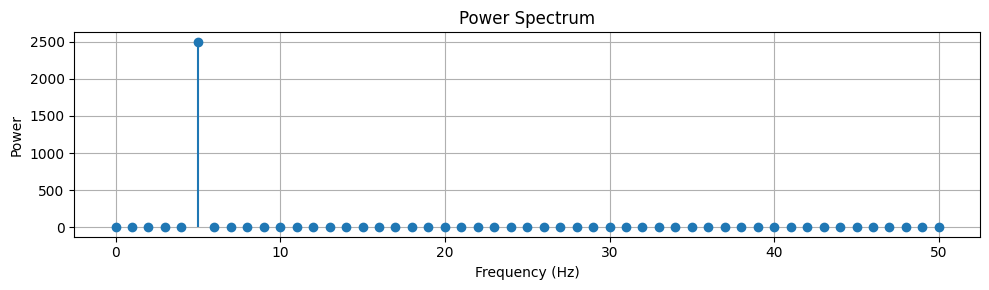

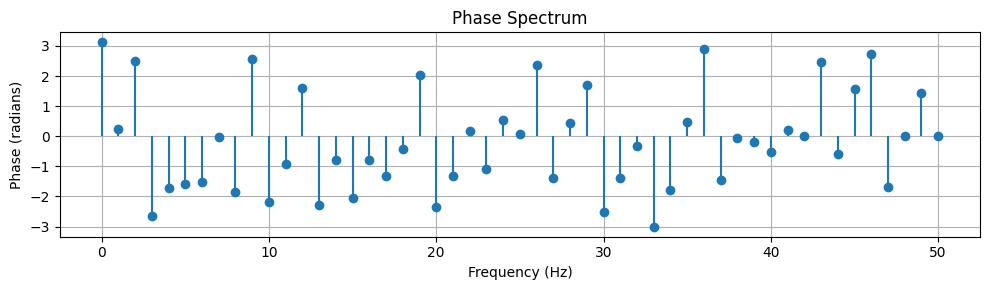

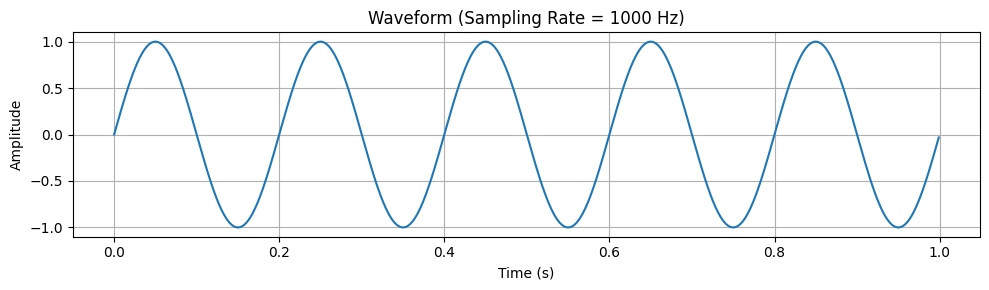

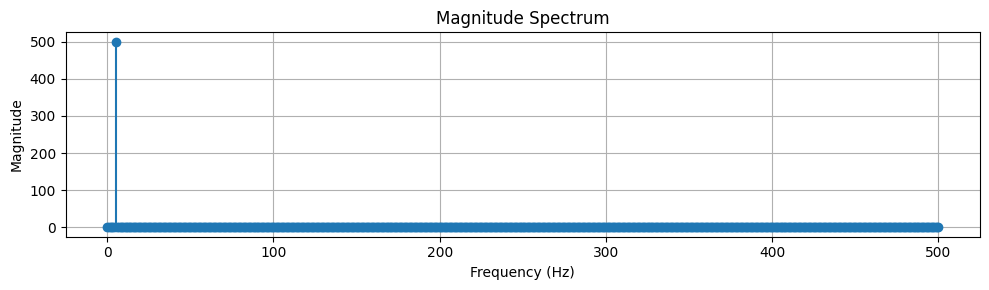

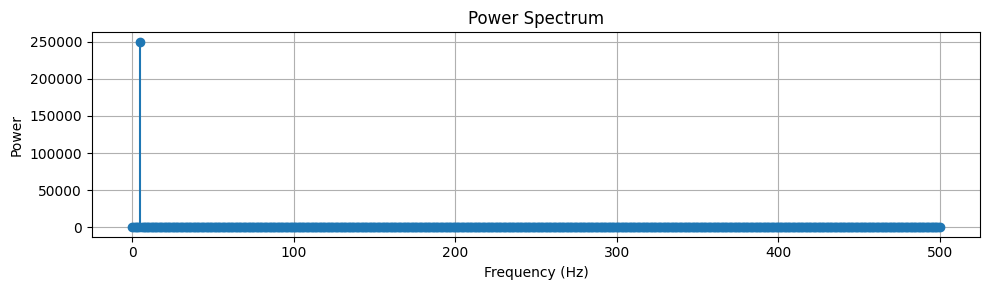

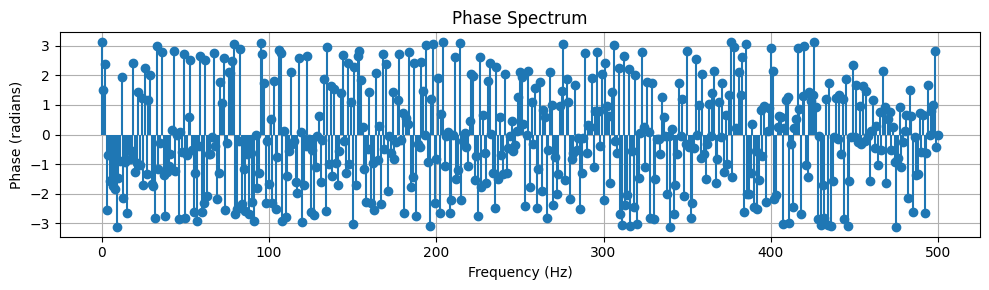

In [41]:
for sample_rate in [20, 50, 100, 1000]:
    analyze_wave(sr=sample_rate, freq=5)

# Exercise


In [42]:
from scipy.signal import butter, filtfilt
import IPython.display as ipd

def butter_filter(data, sr, cutoff, btype='low', order=5):
    nyq = 0.5 * sr
    normal_cutoff = np.array(cutoff) / nyq if isinstance(cutoff, (list, tuple)) else cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)


Duration: 5.16 seconds


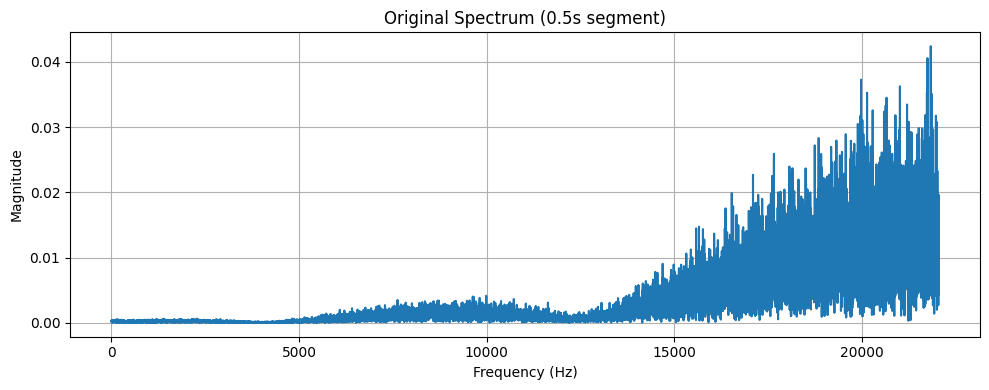

In [43]:
file_path = "/kaggle/input/lion-roar/559600__podcapocalipsis__lion-roar.wav"
y, sr = librosa.load(file_path, sr=None)

duration_sec = len(y) / sr
print(f"Duration: {duration_sec:.2f} seconds")

# Use 0.5s from a valid time (e.g., start at 0.5s)
start_time = 0.5
end_time = start_time + 0.5

# Convert to sample index and clip within bounds
start_sample = int(start_time * sr)
end_sample = int(min(len(y), end_time * sr))

segment = y[start_sample:end_sample]

# Check if segment has sufficient data
if len(segment) == 0:
    raise ValueError("Segment is empty. Choose a valid start time and ensure the signal is long enough.")

# Plot spectrum
N = len(segment)
fft_vals = np.fft.rfft(segment)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude)
plt.title("Original Spectrum (0.5s segment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Listen to original segment
ipd.Audio(segment, rate=sr)

In [44]:
# Low-pass filter (below 1000 Hz)
low = butter_filter(segment, sr, cutoff=1000, btype='low')
ipd.display(ipd.Audio(low, rate=sr))

# High-pass filter (above 1000 Hz)
high = butter_filter(segment, sr, cutoff=1000, btype='high')
ipd.display(ipd.Audio(high, rate=sr))

# Band-stop filter (remove 500–2000 Hz)
bandstop = butter_filter(segment, sr, cutoff=[500, 2000], btype='bandstop')
ipd.display(ipd.Audio(bandstop, rate=sr))

# Question:

    How does the timbre change?

    Which harmonics disappeared after filtering?

    Which part sounds more muffled or brighter?

## Answer

1. Timbre berubah karena beberapa harmonik (frekuensi tambahan selain nada dasar) dihilangkan atau dikurangi.
2. Harmonik yang hilang adalah yang frekuensinya berada di luar batas filter.
3.    
* Jika Anda menggunakan low-pass filter (memotong frekuensi tinggi), suara hasil filtering akan terdengar muffled.
* Jika menggunakan high-pass filter atau filter yang mempertahankan frekuensi tinggi, suara akan terdengar bright.